# Μέρος Α

**Βαπόρης Δημήτριος          ΑΕΜ: 10625**

**Μπαρμπαγιάννος Βασίλειος   ΑΕΜ: 10685**


Αναγνώριση του στρες του παίκτη και ανάπτυξη συστήματος ταξινόμησης του στρες βάσει ενός δείκτη x σε δύο κλάσεις:


*   κλάση $ω_1$: χωρίς στρες
*   κλάση $ω_2$: με στρες


Η κατανομή πυκνότητας πιθανότητας που ακολουθεί o δείκτης x είναι:

> $p(x|θ) = \frac{1}{π}\frac{1}{1+(x-θ)^2}$

Αυτός ο τύπος κατανομής ονομάζεται *κατανομή Cauchy.*

Για να διαπιστώσουμε αν ο δείκτης είναι αξιόπιστος, ζητάμε από 12 συναδέλφους να παίξουν ένα παιχνίδι της εταιρείας και μετράμε τον δείκτη για καθέναν από αυτούς.
Έπειτα ρωτάμε τους συναδέλφους αν ένιωσαν ή όχι στρες.
Από τους 12 οι 7 δήλωσαν ότι δεν ένιωσαν στρες ενώ οι 5 δήλωσαν ότι το παιχνίδι
τους δημιούργησε έντονο στρες.

Θα υλοποιήσουμε έναν ταξινομητή μέγιστης πιθανοφάνειας.


# 1ο ερώτημα
1) Εκτιμήστε τις παραμέτρους $\hatθ_1$ και $\hatθ_2$ με την μέθοδο της μέγιστης πιθανοφάνειας και για τις δύο κλάσεις
αν για την κλάση $ω_1$ οι δείκτες είναι $D_1 = [2.8, −0.4, −0.8, 2.3, −0.3, 3.6, 4.1]$ ενώ για την κλάση $ω_2$ είναι $D_2 = [−4.5, −3.4, −3.1, −3.0, −2.3]$. Απεικονίστε τις $\log p(D_1|θ)$ και $\log p(D_2|θ)$ σε συνάρτηση με τη $θ$.

---

**Σημείωση:** το $θ$ μπορεί να ερμηνευτεί ως το κέντρο της κατανομής γύρω από το οποίο οι παρατηρήσεις είναι πιθανό να συγκεντρωθούν. Είναι η μέση τιμή της κατανομής.

Οι δείκτες $D_1$ και $D_2$ είναι σειρές δεδομένων που αντιπροσωπεύουν τις παρατηρήσεις για τις δύο κλάσεις που θέλουμε να ταξινομήσουμε.

Κάθε αριθμός στην λίστα $D_1$ και $D_2$ είναι ένα δείγμα ή παρατήρηση (δηλαδή, μια τιμή $x_i$) που προέρχεται από μια κλάση. Οι αριθμοί αυτοί αντιπροσωπεύουν τις τιμές των χαρακτηριστικών που μετρήθηκαν για κάθε παρατήρηση.

Η μέθοδος μέγιστης πιθανοφάνειας επιδιώκει να βρει την τιμή του $θ$ που μεγιστοποιεί την πιθανότητα των δεδομένων που έχουμε παρατηρήσει.

Δουλεύουμε με τη συνάρτηση log-likelihood για ευκολία στους υπολογισμούς.

Η συνάρτηση log-likelihood για την κατανομή Cauchy είναι:

> $\log L(\theta) = -N \log(π) - \sum_{i=1}^{N} \log\left(1 + (x_i - θ)^2 \right)$


Η εκτιμώμενη τιμή θ1 για την κλάση ω1 είναι: 0.05641480786467753
Η εκτιμώμενη τιμή θ2 για την κλάση ω2 είναι: -3.1585764734354
Η log-πιθανότητα για την κλάση ω1 είναι: -10.260078097297484
Η log-πιθανότητα για την κλάση ω2 είναι: -1.6665699302355994


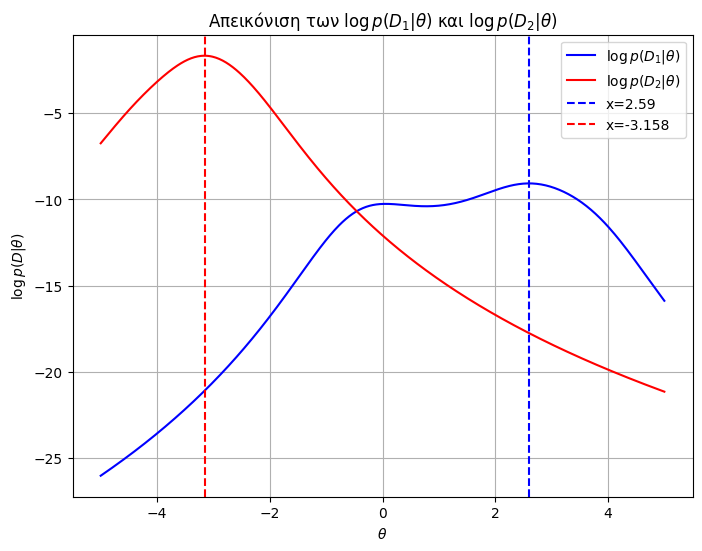

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Δημιουργία κλάσης Classifier
class Classifier:

    def __init__(self):
        self.theta_1 = None  # Εκτιμώμενη τιμή για το θ1 (κλάση ω1)
        self.theta_2 = None  # Εκτιμώμενη τιμή για το θ2 (κλάση ω2)

    # Συνάρτηση log-likelihood για την κατανομή Cauchy
    def log_likelihood(self, theta, data):
        return -np.sum(np.log(1 + (np.array(data) - theta)**2))

    # Συνάρτηση fit για υπολογισμό της μέγιστης πιθανότητας (MLE) για κάθε κλάση
    def fit(self, D1, D2):
        # Ελαχιστοποίηση της αρνητικής log-likelihood για την κλάση ω1
        # Αυτό σημαίνει ότι προσπαθούμε να μεγιστοποιήσουμε την πιθανότητα
        result_1 = minimize(lambda theta: -self.log_likelihood(theta, D1), x0=0.0)
        self.theta_1 = result_1.x[0]  # Αποθηκεύουμε την εκτιμώμενη τιμή για το θ1

        # Ελαχιστοποίηση της αρνητικής log-likelihood για την κλάση ω2
        result_2 = minimize(lambda theta: -self.log_likelihood(theta, D2), x0=0.0)
        self.theta_2 = result_2.x[0]  # Αποθηκεύουμε την εκτιμώμενη τιμή για το θ2

    # Συνάρτηση για υπολογισμό των log-πιθανοτήτων για κάθε κλάση
    def compute_log_probability(self, D1, D2):
        # Υπολογισμός της log-πιθανότητας για τα δεδομένα D1 και D2
        log_p_D1 = -np.sum(np.log(1 + (np.array(D1) - self.theta_1)**2))  # Log-likelihood για την κλάση ω1
        log_p_D2 = -np.sum(np.log(1 + (np.array(D2) - self.theta_2)**2))  # Log-likelihood για την κλάση ω2

        # Επιστροφή των log-πιθανοτήτων για τα σύνολα δεδομένων D1 και D2
        return log_p_D1, log_p_D2

# Δεδομένα για τις δύο κλάσεις
D1 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]  # Δεδομένα για την κλάση ω1
D2 = [-4.5, -3.4, -3.1, -3.0, -2.3]           # Δεδομένα για την κλάση ω2

# Δημιουργία του αντικειμένου Classifier
classifier = Classifier()

# Εκπαίδευση του μοντέλου (fit) με τα δεδομένα D1 και D2
classifier.fit(D1, D2)

# Υπολογισμός των log-πιθανοτήτων για τα δεδομένα D1 και D2
log_p_D1, log_p_D2 = classifier.compute_log_probability(D1, D2)

# Εμφάνιση των εκτιμώμενων τιμών θ1 και θ2 και των log-πιθανοτήτων
print(f"Η εκτιμώμενη τιμή θ1 για την κλάση ω1 είναι: {classifier.theta_1}")
print(f"Η εκτιμώμενη τιμή θ2 για την κλάση ω2 είναι: {classifier.theta_2}")
print(f"Η log-πιθανότητα για την κλάση ω1 είναι: {log_p_D1}")
print(f"Η log-πιθανότητα για την κλάση ω2 είναι: {log_p_D2}")

# Εύρος τιμών θ για τον άξονα x
theta_values = np.linspace(-5, 5, 500)

# Υπολογισμός των log-πιθανοτήτων για κάθε θ
log_p_D1 = [classifier.log_likelihood(theta, D1) for theta in theta_values]
log_p_D2 = [classifier.log_likelihood(theta, D2) for theta in theta_values]

# Απεικόνιση των log-πιθανοτήτων για D1 και D2
plt.figure(figsize=(8, 6))
plt.plot(theta_values, log_p_D1, label=r'$\log p(D_1|\theta)$', color='blue')
plt.plot(theta_values, log_p_D2, label=r'$\log p(D_2|\theta)$', color='red')
plt.title(r'Απεικόνιση των $\log p(D_1|\theta)$ και $\log p(D_2|\theta)$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\log p(D|\theta)$')
plt.grid(True)
plt.axvline(x=2.59, color='blue', linestyle='--', label='x=2.59')
plt.axvline(x=-3.158, color='red', linestyle='--', label='x=-3.158')
plt.legend()
plt.show()


Τα αποτελέσματα του κώδικα ερμηνεύονται ως εξής:

*   Η εκτιμώμενη τιμή $θ_1$ για την κλάση $ω_1$ είναι $θ_1 = 2.59$.
*   Αυτή η τιμή της παραμέτρου $θ$ μεγιστοποιεί την log-πιθανότητα για τα δεδομένα της κλάσης $ω_1$.
*   Τα δεδομένα της κλάσης $ω_1$ είναι κεντραρισμένα γύρω από την τιμή $θ_1 = 2.59$.

*   Η εκτιμώμενη τιμή $θ_2$ για την κλάση $ω_2$ είναι $θ_2 = -3.158$.
*   Αυτή η τιμή της παραμέτρου $θ$ μεγιστοποιεί την log-πιθανότητα για τα δεδομένα της κλάσης $ω_2$.
*   Τα δεδομένα της κλάσης $ω_2$ είναι κεντραρισμένα γύρω από την τιμή $θ_2 = -3.158$.

---

*   $\log p(D_1∣θ_1) = −10.260$
*   Αυτή είναι η τιμή της $log$-πιθανότητας των δεδομένων της κλάσης $ω_1$ όταν το $θ$ είναι ίσο με την εκτιμώμενη τιμή $θ_1$.
*   $\log p(D_2∣θ_2) = −1.667$
*   Αυτή είναι η τιμή της $log$-πιθανότητας των δεδομένων της κλάσης $ω_2$ όταν το $θ$ είναι ίσο με την εκτιμώμενη τιμή $θ_2$.




# 2ο ερώτημα
Χρησιμοποιήστε τη συνάρτηση διάκρισης
$g(x) = \log P(x|\hatθ_1) − \log P(x|\hatθ_2) + \log P(ω_1) − \log P(ω_2)$ και ταξινομήστε τα δύο σύνολα τιμών. Τι παρατηρείτε για το πρόσιμο της $g(x)$ σε σχέση με τα δεδομένα σας (απεικονίστε την); Περιγράψτε τον κανόνα απόφασης. Τι παρατηρείτε σε σχέση με την ταξινόμηση των δεδομένων σας με βάση αυτόν τον κανόνα;

---

Υπολογίζουμε την $g(x)$ για κάθε δείγμα $x$ από τα σύνολα $D_1$ και $D_2$.
Αν $g(x) > 0$, το $x$ ταξινομείται ως $ω_1$. Αν $g(x) < 0$, το $x$ ταξινομείται ως $ω_2$.


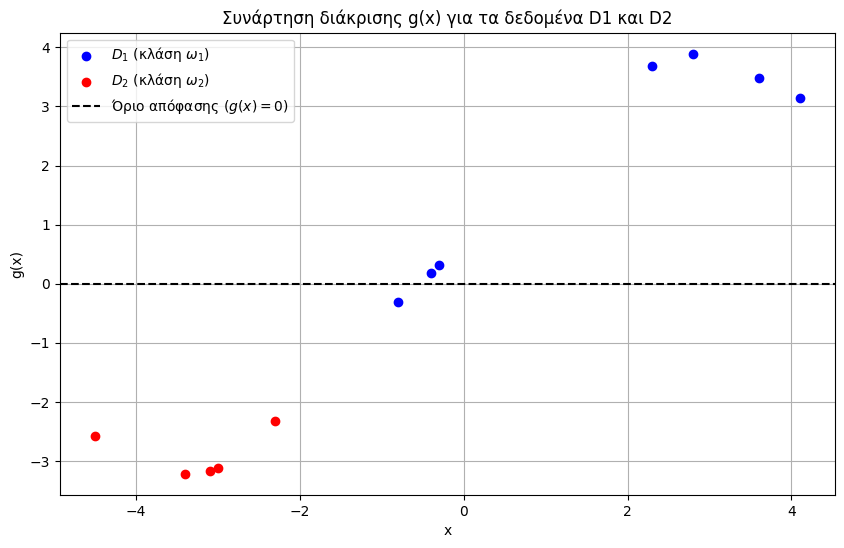

g(x) για την κλάση ω1 (D1): [3.892081198246286, 0.18821823214045885, -0.3116371674859495, 3.6795082493734035, 0.31235049547230664, 3.481140370509939, 3.135937714335965]
g(x) για την κλάση ω2 (D2): [-2.5704513025014126, -3.215198038103472, -3.169970711020588, -3.1146456345891984, -2.330907485087365]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Classifier:
    def __init__(self):
        self.theta1 = None
        self.theta2 = None

    # Υπολογισμός μέγιστης πιθανοφάνειας για κάθε κλάση
    def fit(self, D1, D2, theta_candidates):
        log_likelihoods_D1 = [np.sum(np.log(1 / (1 + (D1 - theta)**2))) for theta in theta_candidates]
        log_likelihoods_D2 = [np.sum(np.log(1 / (1 + (D2 - theta)**2))) for theta in theta_candidates]
        self.theta1 = theta_candidates[np.argmax(log_likelihoods_D1)]
        self.theta2 = theta_candidates[np.argmax(log_likelihoods_D2)]

    # Υπολογισμός της συνάρτησης διάκρισης g(x) για ένα δεδομένο
    def g_function(self, x, p_w1 = 7/12, p_w2 = 5/12):
        log_p_x_given_theta1 = np.log(1 / (1 + (x - self.theta1)**2))
        log_p_x_given_theta2 = np.log(1 / (1 + (x - self.theta2)**2))
        log_p_w1 = np.log(p_w1)
        log_p_w2 = np.log(p_w2)
        return log_p_x_given_theta1 - log_p_x_given_theta2 + log_p_w1 - log_p_w2

    # Υπολογισμός της συνάρτησης διάκρισης g(x) για ένα σύνολο δεδομένων
    def predict(self, D, p_w1 = 7/12, p_w2 = 5/12):
        g_values = [self.g_function(x, p_w1, p_w2) for x in D]
        return g_values

# Δεδομένα για τις δύο κλάσεις
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])
theta_candidates = np.linspace(-5, 5, 500)  # Υποψήφιες τιμές για το θ

# Δημιουργία του ταξινομητή
classifier = Classifier()

# Εκπαίδευση του ταξινομητή
classifier.fit(D1, D2, theta_candidates)

# Υπολογισμός της συνάρτησης διάκρισης g(x) για κάθε δείγμα
g_D1 = classifier.predict(D1)
g_D2 = classifier.predict(D2)

# Απεικόνιση των αποτελεσμάτων
plt.figure(figsize=(10, 6))
plt.scatter(D1, g_D1, color='blue', label=r'$D_1$ (κλάση $\omega_1$)')
plt.scatter(D2, g_D2, color='red', label=r'$D_2$ (κλάση $\omega_2$)')
plt.axhline(0, color='black', linestyle='--', label='Όριο απόφασης ($g(x) = 0$)')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Συνάρτηση διάκρισης g(x) για τα δεδομένα D1 και D2')
plt.legend()
plt.grid()
plt.show()

# Εκτύπωση αποτελεσμάτων
print("g(x) για την κλάση ω1 (D1):", g_D1)
print("g(x) για την κλάση ω2 (D2):", g_D2)


1.  Στην οπτική αναπαράσταση του $g(x)$ (παραπάνω κώδικας), τα σημεία του $D_1$ εμφανίζονται πάνω από τον άξονα $y=0$ (θετικά $g(x)$) ενώ τα σημεία του $D_2$ εμφανίζονται κάτω από τον άξονα $y=0$ (αρνητικά $g(x)$).
Η γραμμή $g(x)=0$ λειτουργεί ως το όριο απόφασης για την ταξινόμηση.

2.  Ο κανόνας απόφασης προκύπτει από το πρόσημο της συνάρτησης $g(x)$:

*   Αν $g(x) > 0$ το σημείο $x$ ταξινομείται στην κλάση $ω_1$.
*   Αν $g(x) < 0$ το σημείο $x$ ταξινομείται στην κλάση $ω_2$.
*   Αν $g(x) = 0$ το σημείο $x$ βρίσκεται πάνω στο όριο απόφασης και δεν ξέρουμε σε ποια κλάση να το ταξινομήσουμε.

3.   Μερικά σημεία $x$ ταξινομούνται στην κλάση $ω_1$ (μπλε χρώμα) παρόλο που βρίσκονται στα αρνητικά του ορίου απόφασης, δηλαδή γι' αυτά τα σημεία ισχύει $g(x) < 0$.













# Μέρος Β

Τώρα πρέπει να υλοποιήσουμε έναν νέο ταξινομητή εκτιμώντας την άγνωστη παράμετρο $θ$ με τη μέθοδο εκτίμησης κατά Bayes.

Οι τιμές της παραμέτρου $θ$ μπορούν να μοντελοποιηθούν με τη συνάρτηση πυκνότητας πιθανότητας (prior):

> $p(θ) = \frac{1}{10π} \frac{1}{1 + (θ/10)^2}$

Τώρα θα υπολογίσουμε την *a posteriori* πιθανότητα $p(θ|D)$ και την πυκνότητα πιθανότητας $p(x|D_j), j=1,2$.


# 1ο ερώτημα
Απεικονίστε τις εκ των υστέρων πυκνότητες πιθανότητας $p(θ|D1)$ και $p(θ|D2)$. Τι παρατηρείτε σε σχέση με την (prior) $p(θ)$;

*Βοήθεια: Για τον υπολογισμό των ολοκληρωμάτων μπορείτε να χρησιμοποιήσετε τον κανόνα του τραπεζίου.*

---

Η εκ των υστέρων συνάρτηση πυκνότητας πιθανότητας υπολογίζεται μέσω του θεωρήματος του Bayes:

> $p(θ|D) = \frac{p(D|θ)p(θ)}{\int{p(D|θ)p(θ)dθ}}$  $(1)$

Υπολογίζουμε την $p(D|θ)$ για καθένα από τα σύνολα $D_1$ και $D_2$.



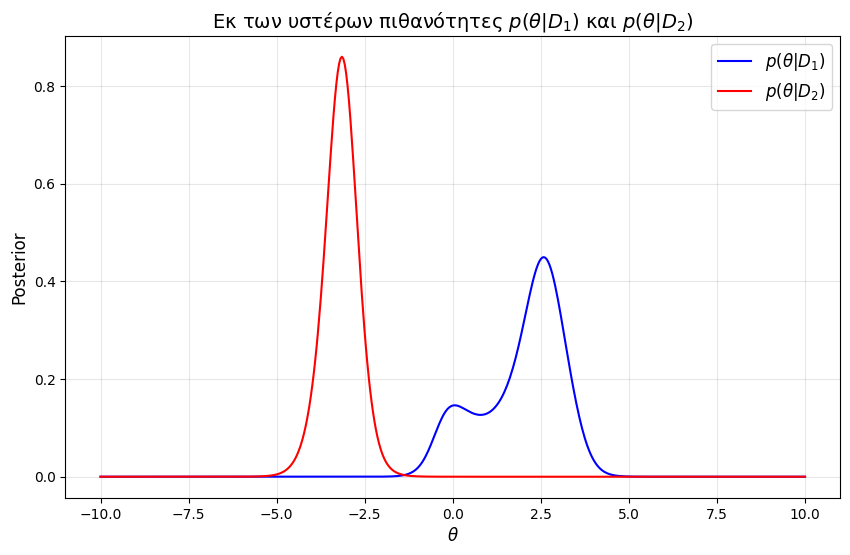

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Δεδομένα του προβλήματος
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

# Συνάρτηση prior για την παράμετρο θ: p(θ)
def prior(theta):
    return 1 / (10 * np.pi * (1 + (theta / 10)**2))

# Συνάρτηση πιθανοφάνειας (likelihood): p(D|θ)
def likelihood(D, theta):
    return np.prod(1 / (1 + (D - theta)**2))

# Συνάρτηση posterior: p(θ|D) = (p(D|θ) * p(θ)) / denominator, όπου denominator είναι ο παρονομαστής της εξίσωσης (1).
def posterior(D, theta):
    # Αριθμητής
    numerator = likelihood(D, theta) * prior(theta)
    # Παρονομαστής (ολοκλήρωμα)
    denominator, _ = quad(lambda t: likelihood(D, t) * prior(t), -np.inf, np.inf)
    return numerator / denominator

# Υπολογισμός της εκ των υστέρων πιθανότητας p(θ|D) για διαφορετικές τιμές θ
theta_values = np.linspace(-10, 10, 500)
posterior_D1 = [posterior(D1, theta) for theta in theta_values]
posterior_D2 = [posterior(D2, theta) for theta in theta_values]

# Γραφική απεικόνιση των εκ των υστέρων πιθανοτήτων
plt.figure(figsize=(10, 6))
plt.plot(theta_values, posterior_D1, label=r"$p(\theta|D_1)$", color="blue")
plt.plot(theta_values, posterior_D2, label=r"$p(\theta|D_2)$", color="red")
plt.title("Εκ των υστέρων πιθανότητες $p(\\theta|D_1)$ και $p(\\theta|D_2)$", fontsize=14)
plt.xlabel(r"$\theta$", fontsize=12)
plt.ylabel("Posterior", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


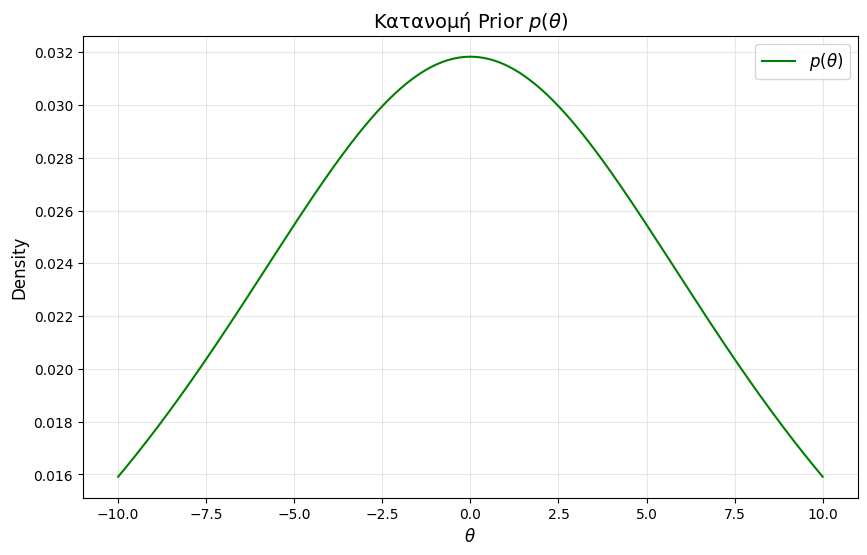

In [ ]:
# Υπολογισμός της prior p(θ) για τις ίδιες τιμές του θ
prior_values = [prior(theta) for theta in theta_values]

# Γραφική απεικόνιση της prior κατανομής p(θ)
plt.figure(figsize=(10, 6))
plt.plot(theta_values, prior_values, label=r"$p(\theta)$", color="green")
plt.title("Κατανομή Prior $p(\\theta)$", fontsize=14)
plt.xlabel(r"$\theta$", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


*   Η prior πιθανότητα $p(θ)$ επηρεάζει το σχήμα των εκ των υστέρων πυκνοτήτων πιθανότητας, αλλά καθώς τα δεδομένα αυξάνονται ή είναι πολύ ισχυρά, η επίδραση της prior μειώνεται.
*   Η εκ των υστέρων πιθανότητα συνδυάζει τις πληροφορίες από την prior και τα δεδομένα, δίνοντας μας μια πιο ακριβή εκτίμηση της παραμέτρου $θ$.
*   Η $p(θ|D_1)$ και $p(θ|D_2)$ συγκεντρώνονται γύρω από τις πιο πιθανές τιμές για το $θ$, όπως υποδηλώνεται από τα δεδομένα $D_1$ και $D_2$.

**Διαφορές από την prior $p(θ)$:**
1. Η $p(θ)$ είναι πιο πλατιά δείχνοντας έτσι την αρχική αβεβαιότητα για το $θ$.
2. Οι εκ των υστέρων πιθανότητες $p(θ|D_1)$ και $p(θ|D_2)$ είναι πιο στενές αφού τα δεδομένα περιορίζουν το εύρος των πιθανών τιμών του $θ$ αυξάνοντας τη βεβαιότητά μας για την εκτίμηση της παραμέτρου.


# 2ο ερώτημα
Υλοποιήστε μια συνάρτηση predict που θα υπολογίζει τις τιμές μιας συνάρτησης διάκρισης:

$h(x)=\log P(x|D_1)-\log P(x|D_2)+\log P(ω_1)-\log P(ω_2)$.

Τι παρατηρείτε τώρα για τις τιμές τις $h$ σε σχέση με τα σύνολά δεδομένων σας (απεικονίστε την); Πως
αξιολογείτε την μέθοδο εκτίμησης παραμέτρων κατά Bayes σε σχέση με τη μέθοδο της μέγιστης πιθανοφάνειας
για το συγκεκριμένο παράδειγμα; Που πιστεύετε ότι οφείλεται η διαφορά των δύο προσεγγίσεων για το
συγκεκριμένο παράδειγμα;

*Βοήθεια: Μπορείτε να υιοθετήσετε παρόμοια υλοποίηση με το μέρος Α.*


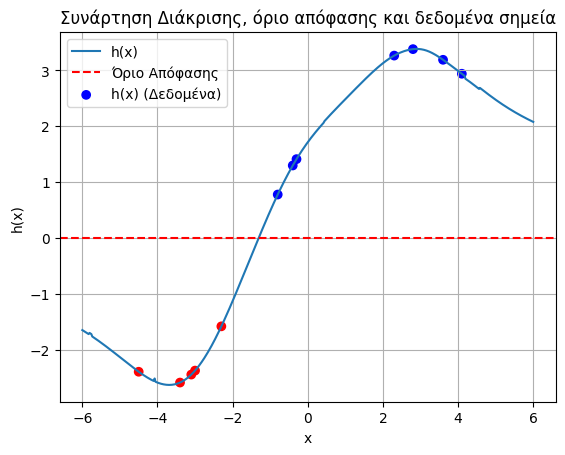

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Τα δεδομένα
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

# Οι δεδομένες συναρτήσεις πυκνότητας πιθανότητας
def p_x_given_theta(x, theta):
    return 1 / (np.pi * (1 + (x - theta)**2))

def p_theta(theta):
    return 1 / (10 * np.pi * (1 + (theta + 10)**2))

# Υπολογισμός της μη κανονικοποιημένης P(θ|D)
def unnormalized_posterior_theta_given_D(theta, D):
    likelihood = np.prod([p_x_given_theta(x, theta) for x in D])
    prior = p_theta(theta)
    return likelihood * prior

# Ορισμός ολοκληρώματος για κανονικοποιημένη posterior
def normalization_constant(D):
    return quad(lambda theta: unnormalized_posterior_theta_given_D(theta, D), -np.inf, np.inf)[0]

# Υπολογισμός της P(x|D)
def p_x_given_D(x, D):
    normalization = normalization_constant(D)
    integrand = lambda theta: p_x_given_theta(x, theta) * unnormalized_posterior_theta_given_D(theta, D)
    return quad(integrand, -np.inf, np.inf)[0] / normalization

# Συνάρτηση διάκρισης h(x)
def discriminant_function(x):
    P_x_given_D1 = p_x_given_D(x, D1)
    P_x_given_D2 = p_x_given_D(x, D2)
    log_P_x_given_D1 = np.log(P_x_given_D1)
    log_P_x_given_D2 = np.log(P_x_given_D2)
    return log_P_x_given_D1 - log_P_x_given_D2 + np.log(7/12) - np.log(5/12)

# Δημιουργία τιμών x για το διάγραμμα
x_values = np.linspace(-6, 6, 500)
h_values = np.array([discriminant_function(x) for x in x_values])
x_given = np.concatenate([D1, D2])
h_given = np.array([discriminant_function(x) for x in x_given])

# Διάγραμμα
plt.plot(x_values, h_values, label='h(x)')
plt.axhline(0, color='red', linestyle='--', label='Όριο Απόφασης')
plt.scatter(x_given, h_given, c=['blue'] * len(D1) + ['red'] * len(D2), label="h(x) (Δεδομένα)")
plt.xlabel('x')
plt.ylabel('h(x)')
plt.title('Συνάρτηση Διάκρισης, όριο απόφασης και δεδομένα σημεία')
plt.legend()
plt.grid(True)
plt.show()

Το $h(x)$ αλλάζει πρόσημο ανάλογα με το ποια κλάση είναι πιο πιθανή για μια συγκεκριμένη τιμή του $x$.

Αν $h(x)>0$, τότε η κλάση $D_1$ είναι πιο πιθανή, ενώ αν $h(x)<0$, η κλάση $D_2$ είναι πιο πιθανή.

Στη συγκεκριμένη περίπτωση, ο κανόνας απόφασης έχει για τα δεδομένα μας 100% ακρίβεια, καθώς όλες οι τιμές του $D_1$ δίνουν $h(x)>0$ και αντίστοιχα οι τιμές του $D_2$ δίνουν $h(x)<0$. Αυτό οφείλεται στο γεγονός ότι εξαλείφεται η επικάλυψη που υπήρχε με τη μεθοδολογία του Μέρους Α με την προσέγγιση κατά Bayes. Η διαφορά οφείλεται, προφανώς, και στην περαιτέρω γνώση του προβλήματος ταξινόμησης με την κατανομή $p(θ)$ να δίνεται.


# Μέρος Γ | **1η ενότητα**

Εργαζόμαστε πάνω σε μία έρευνα που αφορά την αυτοματοποιημένη αναγνώριση διαφορετικών ειδών του φυτού της Ίριδας.
Τρία συγκεκριμένα είδη: η Iris setosa, η Iris versicolor,
και η Iris virginica παρουσιάζον διαφορές στο μήκος και πλάτος των σεπάλων και των πετάλων του άνθους τους.

Διαθέτουμε μια βάση από 150 (50 για κάθε είδος) μετρήσεις τους μήκους
και του πλάτους των σεπάλων και των πετάλων του άνθους κάθε είδους.

Απομονώνοντας μόνο τα δύο πρώτα χαρακτηριστικά της βάσης και χρησιμοποιώντας τον έτοιμο αλγόριθμο DecisionTreeClassifier από τη βιβλιοθήκη sklearn θα ταξινομήσουμε το 50% των τυχαίων δειγμάτων του συνόλου αφού πρώτα εκπαιδεύσουμε τον αλγόριθμο με το υπόλοιπο 50%.



# 1ο ερώτημα
Τι ποσοστό σωστής ταξινόμησης λαμβάνετε; Ποιο βάθος δέντρου σας δίνει το καλύτερο ποσοστό;


In [ ]:
# Εισαγωγή απαραίτητων βιβλιοθηκών
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Φόρτωση του Iris dataset
iris = load_iris()  # Το Iris dataset έχει 3 κατηγορίες φυτών
X = iris.data[:, :2]  # Χρησιμοποιούμε τα δύο πρώτα χαρακτηριστικά (μήκος και πλάτος σεπάλων)
y = iris.target  # Ετικέτες των δεδομένων

# 2. Διαχωρισμός των δεδομένων για εκπαίδευση (50%) και δοκιμή (50%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# 3. Δοκιμή διαφορετικών τιμών για το βάθος του δέντρου
best_accuracy = 0  # Μεταβλητή για την καλύτερη ακρίβεια
best_depth = 0  # Μεταβλητή για το καλύτερο βάθος

print("Βάθος Δέντρου | Ακρίβεια")
print("-------------------------")

# Ελέγχουμε βάθη από 1 έως 10
for depth in range(1, 11):
    # Εκπαίδευση DecisionTreeClassifier με το συγκεκριμένο βάθος
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # Πρόβλεψη στο σύνολο δοκιμής
    y_pred = clf.predict(X_test)

    # Υπολογισμός ακρίβειας
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{depth:^13} | {accuracy:.2f}")

    # Ενημέρωση του καλύτερου βάθους και ακρίβειας
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

# 4. Εμφάνιση του βέλτιστου βάθους και της αντίστοιχης ακρίβειας
print("\nΤο καλύτερο βάθος δέντρου είναι:", best_depth)
print(f"Η μέγιστη ακρίβεια είναι: {best_accuracy:.2f}")


Βάθος Δέντρου | Ακρίβεια
-------------------------
      1       | 0.64
      2       | 0.77
      3       | 0.79
      4       | 0.77
      5       | 0.77
      6       | 0.77
      7       | 0.73
      8       | 0.73
      9       | 0.73
     10       | 0.72

Το καλύτερο βάθος δέντρου είναι: 3
Η μέγιστη ακρίβεια είναι: 0.79


Λαμβάνουμε ποσοστό ταξινόμησης (μέγιστη αρκίβεια) 79%. Αυτό είναι το καλύτερο ποσοστό που μπορούμε να επιτύχουμε. Το βάθος δέντρου που δίνει αυτό το ποσοστό είναι 3.
Αυτό σημαίνει ότι από τα 100 δεδομένα που ταξινομήθηκαν, τα 79 ταξινομήθηκαν σωστά, σχετικά καλή ακρίβεια.
Το βάθος του δέντρου είναι μικρό, άρα λιγότερες αποφάσεις και απλούστερο μοντέλο.

# 2ο ερώτημα
Απεικονήστε τα όρια απόφασης του ταξινομητή για το καλύτερο αποτέλεσμα

*(Βοήθεια: χρησιμοποιήστε τη συνάρτηση contourf)*


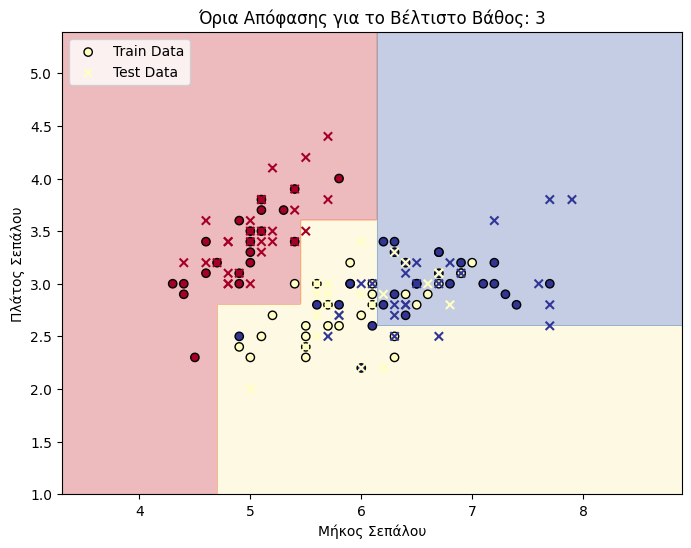

In [ ]:
# Εισαγωγή απαραίτητων βιβλιοθηκών
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 1. Φόρτωση του Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Χρησιμοποιούμε τα δύο πρώτα χαρακτηριστικά
y = iris.target  # Ετικέτες δεδομένων

# 2. Διαχωρισμός δεδομένων σε εκπαίδευση (50%) και δοκιμή (50%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# 3. Εκπαίδευση DecisionTreeClassifier με το καλύτερο βάθος
best_depth = 3  # Το καλύτερο βάθος που υπολογίστηκε στο προηγούμενο ερώτημα
clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
clf.fit(X_train, y_train)

# 4. Ορισμός των ορίων του πλέγματος για την απεικόνιση
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Όρια για το πρώτο χαρακτηριστικό
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Όρια για το δεύτερο χαρακτηριστικό
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))  # Δημιουργία πλέγματος

# 5. Πρόβλεψη για κάθε σημείο του πλέγματος
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)  # Μετατροπή σε μορφή πλέγματος

# 6. Απεικόνιση των ορίων απόφασης
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)  # Όρια απόφασης με χρήση contourf

# 7. Απεικόνιση των δεδομένων εκπαίδευσης και δοκιμής
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k', label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu, marker='x', label='Test Data')

# 8. Εμφάνιση του γραφήματος
plt.xlabel('Μήκος Σεπάλου')
plt.ylabel('Πλάτος Σεπάλου')
plt.title(f'Όρια Απόφασης για το Βέλτιστο Βάθος: {best_depth}')
plt.legend(loc='upper left')
plt.show()


Οι διαφορετικές περιοχές χρώματος αναπαριστούν τις κλάσεις που προβλέπει το μοντέλο.

# Μέρος Γ | **2η ενότητα**

Τώρα θα δημιουργήσουμε έναν Random Forest ταξινομητή 100 δέντρων με την τεχνική Bootstrap.

Πιο συγκεκριμένα, το 50% των δειγμάτων που χρησιμοποιήσαμε για εκπαίδευση στην προηγούμενη ενότητα (έστω ότι το ονομάσαμε σύνολο Α) το χρησιμοποιούμε τώρα για την δημιουργία 100 νέων συνόλων εκπαίδευσης, ένα για κάθε δέντρο, όπου κάθε φορά θα χρησιμοποιείται το γ = 50% του συνόλου Α. Το σύνολο που ταξινομήσαμε στο προηγούμενο μέρος θα το χρησιμοποιήσουμε και εδώ για αξιολόγηση του αλγορίθμου. Όλα τα δέντρα θα έχουν το ίδιο μέγιστο βάθος.


# 1ο ερώτημα
Τι ποσοστό σωστής ταξινόμησης λαμβάνετε; Ποιο βάθος δέντρου σας δίνει το καλύτερο ποσοστό;


Βάθος Δέντρου | Ακρίβεια
-------------------------
      1       | 0.72
      2       | 0.83
      3       | 0.79
      4       | 0.76
      5       | 0.80
      6       | 0.76
      7       | 0.76
      8       | 0.75
      9       | 0.75
     10       | 0.75

Το καλύτερο βάθος δέντρου είναι: 2
Η μέγιστη ακρίβεια είναι: 0.8266666666666667


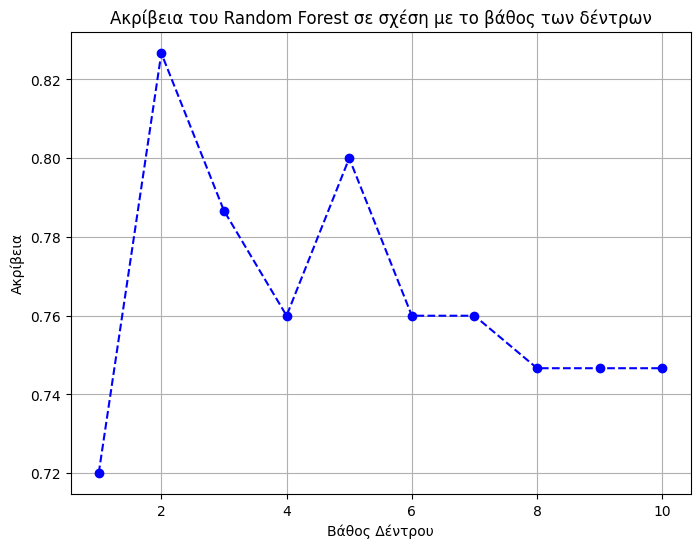

In [ ]:
# Εισαγωγή βιβλιοθηκών
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Φόρτωση του συνόλου δεδομένων (Iris)
iris = load_iris()
X = iris.data[:, :2]  # Χρησιμοποιούμε τα δύο πρώτα χαρακτηριστικά
y = iris.target

# Διαχωρισμός του συνόλου δεδομένων
# Το σύνολο εκπαίδευσης Α είναι το 50% των δεδομένων
X_train_A, X_test, y_train_A, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Δημιουργία 100 bootstrap δειγμάτων από το σύνολο εκπαίδευσης Α
n_trees = 100
sample_size = int(0.5 * len(X_train_A))  # Χρησιμοποιούμε το 50% του συνόλου Α
bootstrap_samples = []

for _ in range(n_trees):
    indices = np.random.choice(range(len(X_train_A)), size=sample_size, replace=True)
    X_bootstrap = X_train_A[indices]
    y_bootstrap = y_train_A[indices]
    bootstrap_samples.append((X_bootstrap, y_bootstrap))

# Εύρεση του βέλτιστου βάθους δέντρου με χρήση του Random Forest
max_depths = range(1, 11)  # Δοκιμάζουμε βάθη από 1 έως 10
accuracies = []

for depth in max_depths:
    # Εκπαίδευση του Random Forest
    rf_classifier = RandomForestClassifier(n_estimators=n_trees, max_depth=depth, bootstrap=True, random_state=42)
    rf_classifier.fit(X_train_A, y_train_A)

    # Αξιολόγηση του μοντέλου
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Εύρεση του βέλτιστου βάθους
best_depth = max_depths[np.argmax(accuracies)]
best_accuracy = max(accuracies)

# Εμφάνιση των αποτελεσμάτων
print("Βάθος Δέντρου | Ακρίβεια")
print("-------------------------")
for depth, acc in zip(max_depths, accuracies):
    print(f"{depth:^13} | {acc:.2f}")

print("\nΤο καλύτερο βάθος δέντρου είναι:", best_depth)
print("Η μέγιστη ακρίβεια είναι:", best_accuracy)

# Οπτικοποίηση των αποτελεσμάτων
plt.figure(figsize=(8, 6))
plt.plot(max_depths, accuracies, marker='o', linestyle='--', color='b')
plt.title('Ακρίβεια του Random Forest σε σχέση με το βάθος των δέντρων')
plt.xlabel('Βάθος Δέντρου')
plt.ylabel('Ακρίβεια')
plt.grid()
plt.show()


# 2ο ερώτημα
Απεικονήστε τα όρια απόφασης του ταξινομητή για το καλύτερο αποτέλεσμα. Τι παρατηρείτε σε σχέση με τον απλό ταξινομητή της προηγούμενης ενότητας;


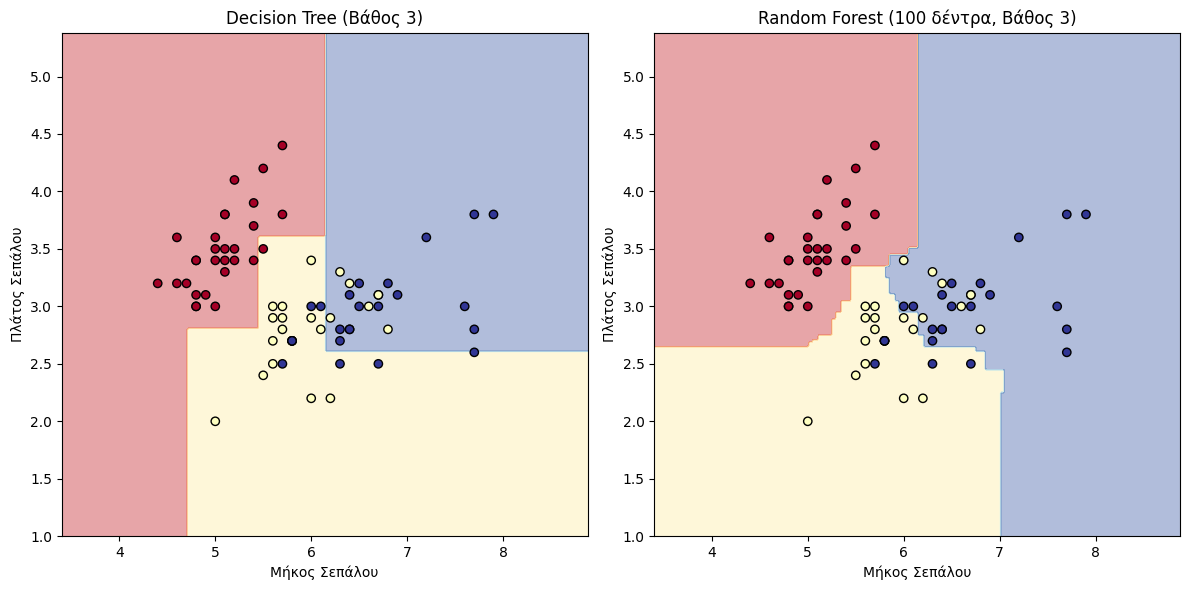

In [ ]:
# Εισαγωγή βιβλιοθηκών
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Φόρτωση του συνόλου δεδομένων (Iris)
iris = load_iris()
X = iris.data[:, :2]  # Χρησιμοποιούμε μόνο τα δύο πρώτα χαρακτηριστικά
y = iris.target

# Διαχωρισμός του συνόλου δεδομένων σε εκπαίδευση και δοκιμή
X_train_A, X_test, y_train_A, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Δημιουργία και εκπαίδευση του Decision Tree (απλού ταξινομητή)
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train_A, y_train_A)

# Δημιουργία και εκπαίδευση του Random Forest ταξινομητή
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=2, bootstrap=True, max_samples = 0.5, random_state=42)
rf_classifier.fit(X_train_A, y_train_A)

# Συνάρτηση για την απεικόνιση των ορίων απόφασης
def plot_decision_boundaries(classifier, X, y, title):
    h = .02  # Βήμα για το πλέγμα
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Πρόβλεψη των κλάσεων σε κάθε σημείο του πλέγματος
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Απεικόνιση των ορίων απόφασης
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel('Μήκος Σεπάλου')
    plt.ylabel('Πλάτος Σεπάλου')

# Απεικόνιση των ορίων απόφασης για τον Decision Tree
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_decision_boundaries(dt_classifier, X_test, y_test, title="Decision Tree (Βάθος 3)")

# Απεικόνιση των ορίων απόφασης για τον Random Forest
plt.subplot(1, 2, 2)
plot_decision_boundaries(rf_classifier, X_test, y_test, title="Random Forest (100 δέντρα, Βάθος 3)")

plt.tight_layout()
plt.show()


Τα όρια απόφασης του Random Forest είναι πιο λεπτομερή και προσαρμοσμένα στα δεδομένα, προσφέροντας καλύτερη ταξινόμηση.


# 3ο ερώτημα
Πώς πιστεύετε ότι επηρεάζει το ποσοστό γ την απόδοση του αλγορίθμου; Δώστε παραδείγματα.


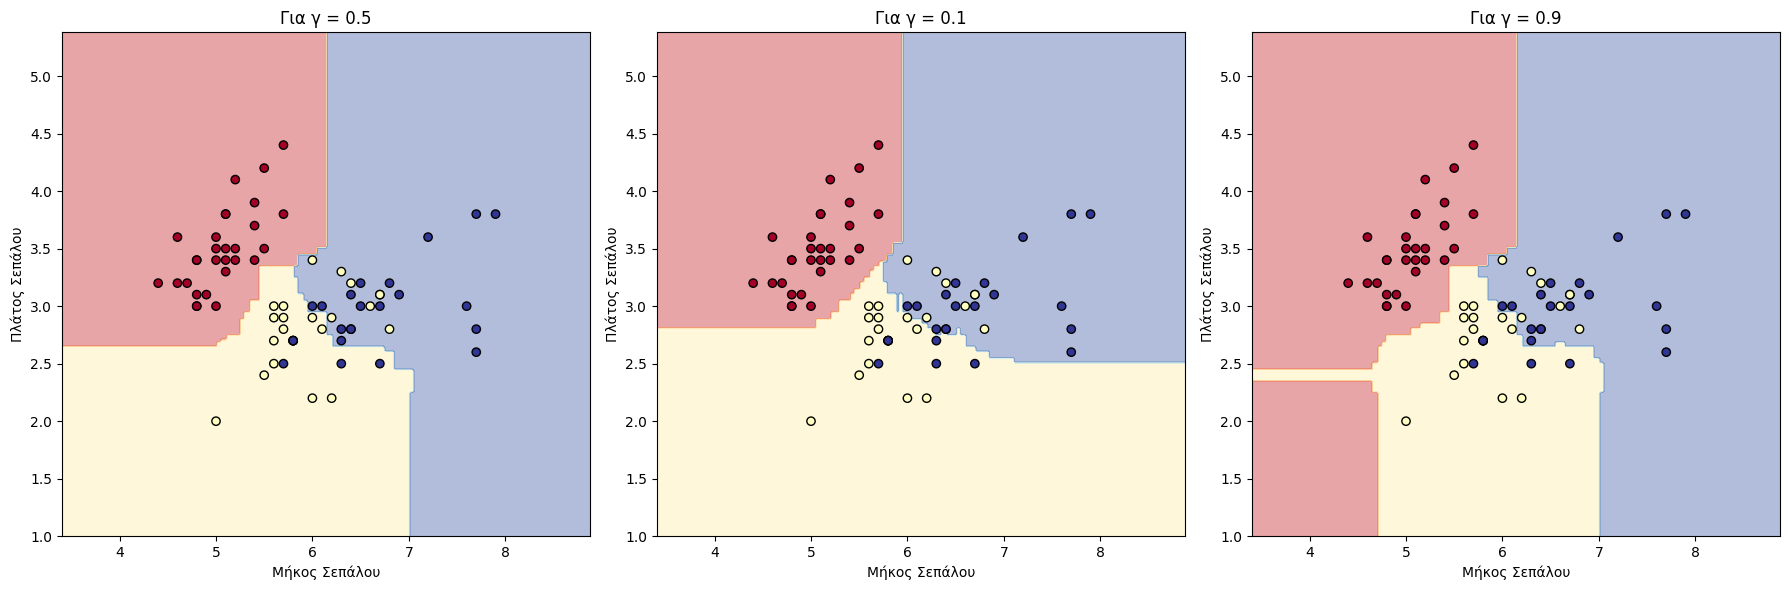

In [ ]:
# Εισαγωγή βιβλιοθηκών
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Φόρτωση του συνόλου δεδομένων (Iris)
iris = load_iris()
X = iris.data[:, :2]  # Χρησιμοποιούμε μόνο τα δύο πρώτα χαρακτηριστικά
y = iris.target

# Διαχωρισμός του συνόλου δεδομένων σε εκπαίδευση και δοκιμή
X_train_A, X_test, y_train_A, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


# Δημιουργία και εκπαίδευση του Random Forest ταξινομητή
rf_classifier1 = RandomForestClassifier(n_estimators=100, max_depth=2, bootstrap=True, max_samples = 0.5, random_state=42)
rf_classifier1.fit(X_train_A, y_train_A)

# Δημιουργία και εκπαίδευση του Random Forest ταξινομητή
rf_classifier2 = RandomForestClassifier(n_estimators=100, max_depth=2, bootstrap=True, max_samples = 0.1, random_state=42)
rf_classifier2.fit(X_train_A, y_train_A)

# Δημιουργία και εκπαίδευση του Random Forest ταξινομητή
rf_classifier3 = RandomForestClassifier(n_estimators=100, max_depth=2, bootstrap=True, max_samples = 0.9, random_state=42)
rf_classifier3.fit(X_train_A, y_train_A)


# Συνάρτηση για την απεικόνιση των ορίων απόφασης
def plot_decision_boundaries(classifier, X, y, title):
    h = .02  # Βήμα για το πλέγμα
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Πρόβλεψη των κλάσεων σε κάθε σημείο του πλέγματος
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Απεικόνιση των ορίων απόφασης
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel('Μήκος Σεπάλου')
    plt.ylabel('Πλάτος Σεπάλου')

# Απεικόνιση των ορίων απόφασης για τον Random Forest 1
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plot_decision_boundaries(rf_classifier1, X_test, y_test, title="Για γ = 0.5")

# Απεικόνιση των ορίων απόφασης για τον Random Forest 2
plt.subplot(1, 3, 2)
plot_decision_boundaries(rf_classifier2, X_test, y_test, title="Για γ = 0.1")

# Απεικόνιση των ορίων απόφασης για τον Random Forest 3
plt.subplot(1, 3, 3)
plot_decision_boundaries(rf_classifier3, X_test, y_test, title="Για γ = 0.9")

plt.tight_layout()
plt.show()
